In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from scipy.stats import pearsonr

%matplotlib inline

# Least squares curve fitting

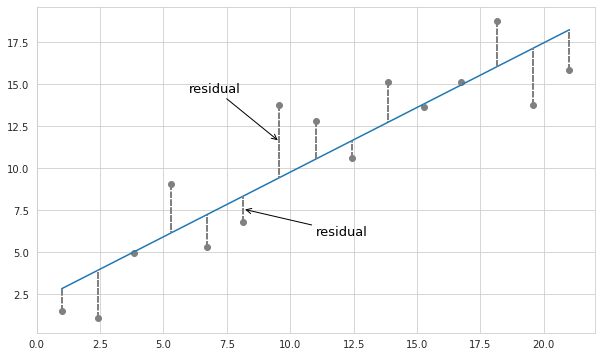

In [4]:
np.random.seed(42)
x = np.linspace(1, 21, 15)
y = np.linspace(0, 21, 15) + np.random.normal(0, 3, 15)

slope, intercept, r_value, p_value, std_err = linregress(x,y) # parameters from least squares computed linear regression

with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x, y, color='grey') # actual data
y_computed = np.array([intercept+i*slope for i in x])
residuals = y_computed - y
ax.plot(x, y_computed) # fitted line
for r in list(zip(x, y, y_computed)):
    ax.plot([x, x], [y, y_computed], linestyle='--', color='gray')
ax.annotate('residual', xy=(x[6],(y[6]+y_computed[6])/2), xytext=(6, 14.5), 
            arrowprops=dict(arrowstyle="->"), fontsize=13)
ax.annotate('residual', xy=(x[5],(y[5]+y_computed[5])/2), xytext=(11, 6), 
            arrowprops=dict(arrowstyle="->"), fontsize=13)
plt.savefig('../../assets/images/regression/residuals_demo.png', bbox_inches='tight');

# Heteroscedasticity

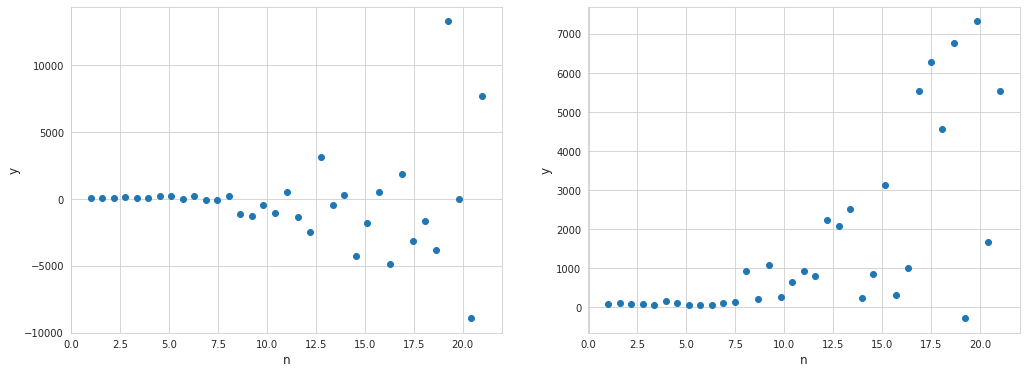

In [80]:
x = np.linspace(1, 21, 35)
np.random.seed(42)
y1 = np.random.normal(100, x**3, 35)
y2 = abs(np.random.normal(100, x**3, 35)) + np.random.normal(0, x**2.5, 35)

with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(1, 2, figsize=(17,6))
ax[0].scatter(x, y1)
ax[1].scatter(x, y2)
for ax in ax:
    ax.set_xlabel('n', fontsize=12)
    ax.set_ylabel('y', fontsize=12)
#plt.savefig('../../assets/images/regression/heteroscedasticity_demo.png', bbox_inches='tight');

# Correlation

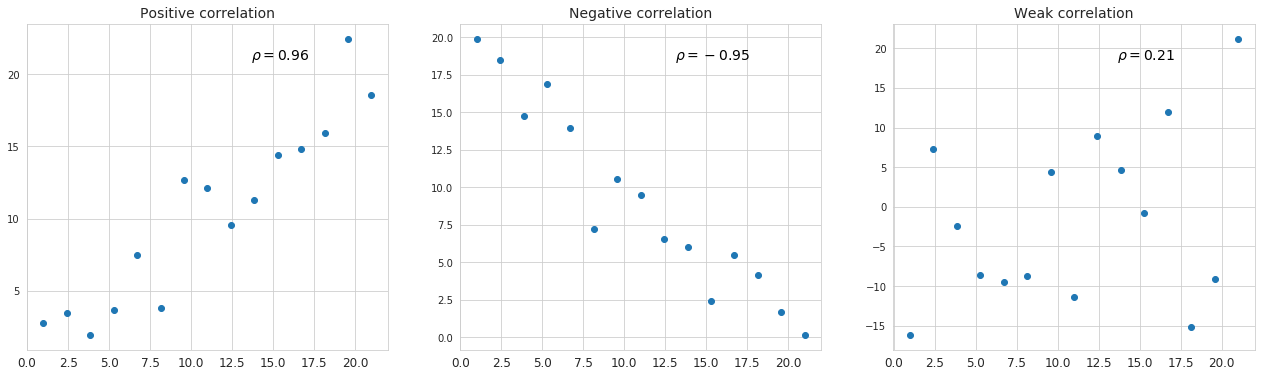

In [3]:
x = np.linspace(1, 21, 15)
def get_data(relation=1):
    if relation == 1: # positive correlation coefficient
        y = np.linspace(0, 21, 15) + np.random.normal(0, 2, 15)
    elif relation == -1:  # negative correlation coefficient
        y = np.linspace(21, 0, 15) + np.random.normal(0, 2, 15)
    elif relation == 0:  # neutral correlation coefficient
        y = np.random.normal(0, 11, 15)
    else: 
        return
    corr, _ = pearsonr(x, y)
    return [y, round(corr, 2)]

with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(1, 3, figsize=(22,6))
    
ax[0].scatter(x, get_data(relation=1)[0])
ax[0].annotate(f'$\\rho={get_data(relation=1)[1]}$', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=14,
        ha='center', va='center')
ax[0].set_title('Positive correlation', fontsize=14)

ax[1].scatter(x, get_data(relation=-1)[0])
ax[1].annotate(f'$\\rho={get_data(relation=-1)[1]}$', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=14,
        ha='center', va='center')
ax[1].set_title('Negative correlation', fontsize=14)

ax[2].scatter(x, get_data(relation=0)[0])
ax[2].annotate(f'$\\rho={get_data(relation=0)[1]}$', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=14,
        ha='center', va='center')
ax[2].set_title('Weak correlation', fontsize=14)

for ax in ax:
    ax.xaxis.set_tick_params(labelsize=12)
#plt.savefig('../../assets/images/regression/correlation_demo.png', bbox_inches='tight');

# Boston hoses prices example

In [1]:
from sklearn.datasets import load_boston

In [15]:
data = load_boston()

In [18]:
data.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [29]:
df = pd.DataFrame(data['data'], columns=data.feature_names)
df['price'] = data['target']

## Validation of linear relationship

In [32]:
df.corr()['price']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
price      1.000000
Name: price, dtype: float64

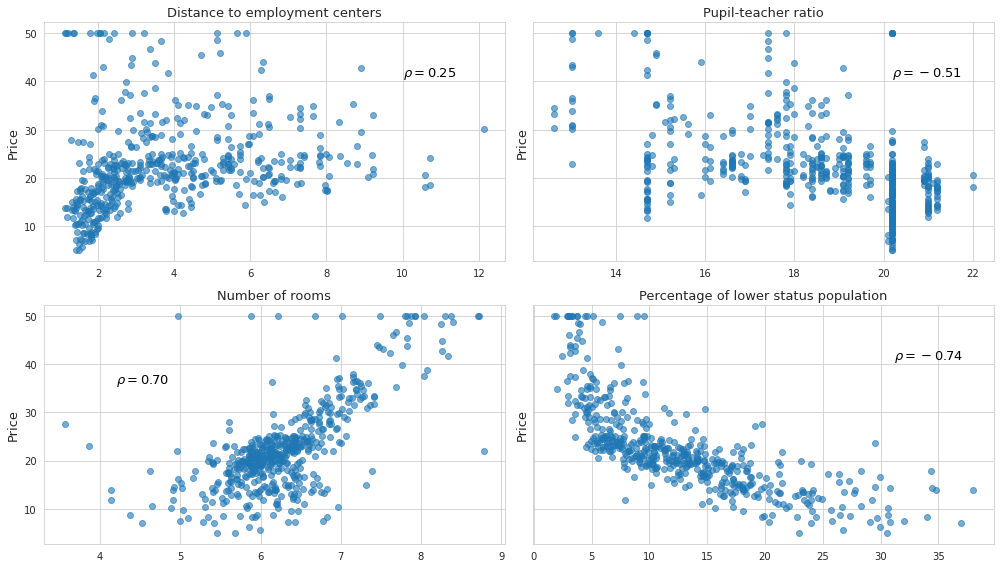

In [82]:
with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(2, 2, figsize=(14, 8), sharey=True)
ax[0][0].scatter(df['DIS'], df['price'], alpha=0.6)
ax[0][0].set_title('Distance to employment centers', fontsize=13)
ax[0][0].text(10, 41, r'$\rho=0.25$', fontsize=13)
ax[0][1].scatter(df['PTRATIO'], df['price'], alpha=0.6)
ax[0][1].set_title('Pupil-teacher ratio', fontsize=13)
ax[0][1].text(20.2, 41, r'$\rho=-0.51$', fontsize=13)
ax[1][0].scatter(df['RM'], df['price'], alpha=0.6)
ax[1][0].set_title('Number of rooms', fontsize=13)
ax[1][0].text(4.2, 36, r'$\rho=0.70$', fontsize=13)
ax[1][1].scatter(df['LSTAT'], df['price'], alpha=0.6)
ax[1][1].set_title('Percentage of lower status population', fontsize=13)
ax[1][1].text(31.2, 41, r'$\rho=-0.74$', fontsize=13)
for r in ax:
    for c in r:
        c.set_ylabel('Price', fontsize=13)
plt.tight_layout()
plt.savefig('../../assets/images/regression/correlation_example2.png', bbox_inches='tight');